# ECOC

[0 1 2]
[0 1 2 3]
Accuracy: 0.65


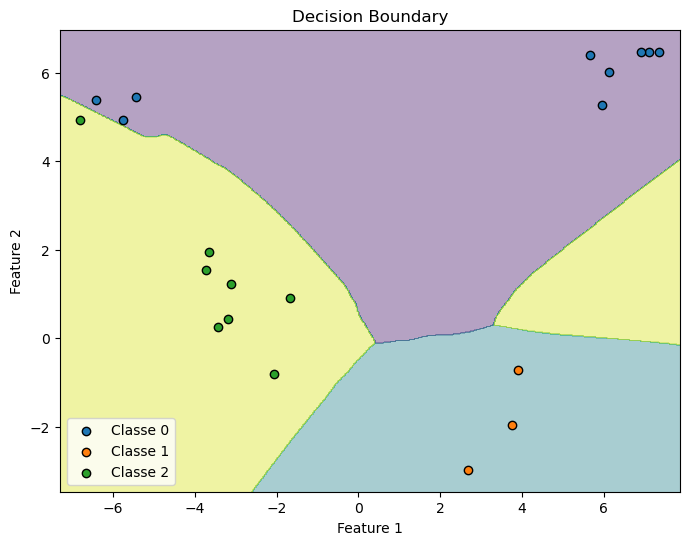

In [ ]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_blobs
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from utils import plot_decision_boundary
import numpy as np

# X, y = make_classification(n_samples=100, n_features=2,
#                            n_informative=2, n_redundant=0, n_classes=10, n_clusters_per_class=1,
#                            random_state=42)
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = OutputCodeClassifier(
#     estimator=SGDClassifier(loss='perceptron', random_state=0),
#     random_state=0).fit(X_train, y_train)

# clf = OutputCodeClassifier(
#     estimator=LogisticRegression(dual=False, random_state=10),
#     random_state=0).fit(X_train, y_train)

# clf = OutputCodeClassifier(
#     estimator=SVC(kernel='linear', random_state=10),
#     random_state=0).fit(X_train, y_train)

clf = OutputCodeClassifier(
    estimator=MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=2000, early_stopping=True),
    random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(np.unique(y_pred))
print(np.unique(y_test))
print(f"Accuracy: {accuracy:.2f}")
plot_decision_boundary(clf, X_test, y_test, 500)

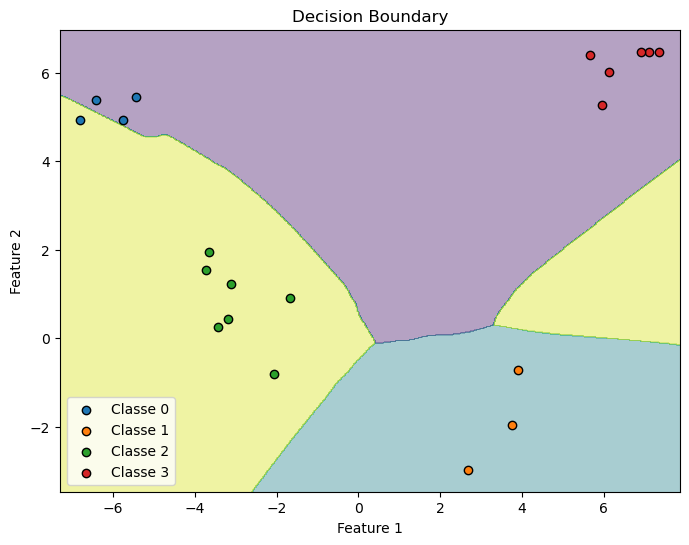

In [ ]:
plot_decision_boundary(clf, X_test, y_pred, 500)

# OVO

[0 1 2 3]
[0 1 2 3]
Accuracy: 0.97


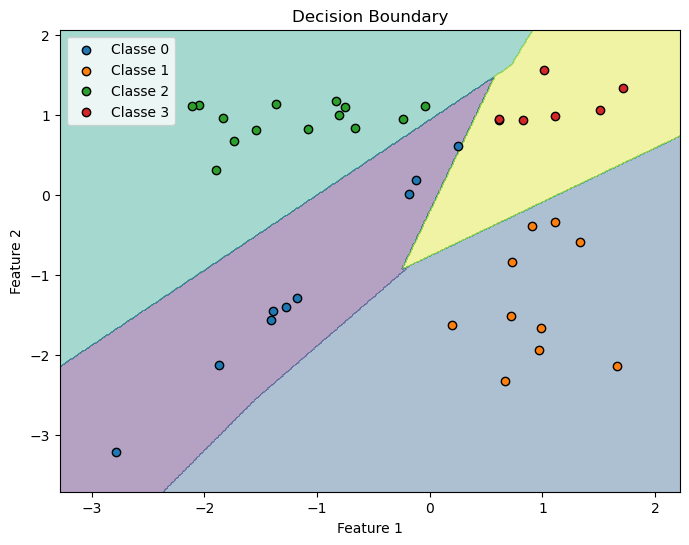

In [59]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_blobs
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from utils import plot_decision_boundary
import numpy as np

X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0, n_classes=4, n_clusters_per_class=1)
# X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = OneVsOneClassifier(
    estimator=SGDClassifier(loss='perceptron', random_state=0)).fit(X_train, y_train)

# clf = OneVsOneClassifier(
#     estimator=LogisticRegression(dual=False, random_state=10)).fit(X_train, y_train)

# clf = OneVsOneClassifier(
#     estimator=SVC(kernel='linear', random_state=10)).fit(X_train, y_train)

# clf = OneVsOneClassifier(
#     estimator=MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=2000, early_stopping=True)).fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(np.unique(y_pred))
print(np.unique(y_test))
print(f"Accuracy: {accuracy:.2f}")
plot_decision_boundary(clf, X_test, y_test, 500)